## Percobaan 1 
### Remove background dan Ekualisasi

### Library

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">
Library di bawah ini mengimpor berbagai pustaka Python yang umum digunakan dalam pemrosesan citra, analisis data, dan pembelajaran mesin. 
Library pertama yaitu <code> os </code> digunakan untuk berinteraksi dengan sistem file, seperti membaca direktori atau mengelola path contohnya saat membaca isi dari folder <code>datasetfix</code> yang berisi subfolder dan mengakses isi dari subfolder. 
<code> matplotlib.pyplot</code> digunakan untuk visualisasi data dalam bentuk grafik atau gambar, contoh yang digunakan pada <code> plt.figure() </code> yang berfungsi untuk mengatur ukuran gambar dan lain sebagainya. 
Library <code>cv2</code> dari OpenCV digunakan untuk konversi warna pada citra, contoh citra RGB yang diubah menjadi GRAY. 
Library <code>numpy</code> berguna untuk operasi numerik berbasis array, contoh <code> np.zeros </code> yang berfungsi untuk membuat array kosong. 
Library <code>pandas</code> dipakai untuk manipulasi data dalam bentuk tabel (DataFrame) contohnya pada <code>pd.DataFrame</code>.  Library <code>tqdm</code> digunakan untuk menampilkan progress bar yang interaktif saat menjalankan loop. 

Library <code>sklearn.model_selection</code>, mengimport <code> train_test_split </code> digunakan untuk membagi dataset menjadi <code> training </code> dan <code> testing </code>. Berbagai metrik evaluasi model seperti <code> accuracy_score, classification_report, precision_score, recall_score, dan f1_score </code> diimpor dari <code> sklearn.metrics </code> untuk mengukur performa model klasifikasi. <code> confusion_matrix </code> dan <code>ConfusionMatrixDisplay </code> digunakan untuk membuat dan menampilkan confusion matrix, yang memberikan informasi detail tentang prediksi model terhadap tiap kelas.

Library <code> sklearn.svm, sklearn.ensemble, sklearn.neighbors </code> digunakan untuk mengimport SVC, KNeighborsClassfier, dan RandomForestClassifier yang akan digunakan untuk melakukan klasifikasi dengan SVM, KNN dan RF.

Library <code>sklearn.ensemble</code> digunakan untuk mengimport <code>graycomatrix</code> dan <code>graycoprops</code> yang digunakan untuk menghitung glcm. 

Librarys <code>scipy.stats</code> digunakan untuk mengimport <code>entropy</code>

Library <code>seaborn</code> digunakan untuk visualisasi data statistik

</div>

In [1]:
import os
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import pandas as pd
import math
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import graycomatrix, graycoprops
from scipy.stats import entropy
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay)
from sklearn.decomposition import PCA
import seaborn as sns
from rembg import remove


<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">
<code>resize_image</code> digunakan untuk mengubah ukuran citra. Pertama mengambil ukuran asli citra yaitu panjang, lebar dan saluran warnanya. Selanjutnya mendefinisikan target ukuran dari citra yang akan diubah ukurannya. <code> np.zeros </code> digunakan untuk membuat array kosong yang berfungsi untuk menyimpan hasil citra yang melakukan proses resize. selanjutnya perulangan  berfungsi untuk mengisi seluruh pixel dari citra resize. <code> original_x/y = int(i/j * width / target_width)</code> berfungsi untuk memetakan koordinat piksel dari citra resize ke koordinat piksel yang sesuai di citra asli. <code> resized_image[i, j] = image[original_y, original_x] </code> berfungsi uuntuk menyalin nilai piksel dari citra asli ke citra baru berdasarkan koordinat yang dihitung.

Kami menggunakan resize agar citra pada dataset yang kami gunakan memiliki ukuran yang sama contoh 100 x 100 dan memudahkan saat dilakukan proses karena pada dataset asal antara satu citra dengan citra yang lain memiliki panjang dan lebar yang berbeda-beda.

</div>

In [2]:
def resize_image(image, target_size):
    height, width, _ = image.shape
    target_width, target_height = target_size
    resized_image = np.zeros((target_height, target_width, 3), dtype=np.uint8)

    for i in range(target_height):
        for j in range(target_width):
            original_x = int(j * width / target_width)
            original_y = int(i * height / target_height)
            resized_image[i, j] = image[original_y, original_x]

    return resized_image

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">

Fungsi <code>insertGambar</code> ini bertujuan untuk memuat citra dari sebuah folder yang berisi subfolder berdasarkan kategori (label), kemudian mengolah dan menyimpan data citra tersebut dalam beberapa struktur data yang terorganisir. Pertama, fungsi ini menginisialisasi beberapa list dan dictionary yang akan menyimpan data gambar, nama file, label kategori, path kategori, distribusi data per kategori, dan kumpulan data kategori secara lengkap. Fungsi kemudian membaca setiap subfolder dalam folder utama sebagai kategori, dan mencatat jumlah gambar dalam setiap kategori tersebut ke dalam <code> data_distribution </code>. Selanjutnya, untuk setiap gambar di dalam subfolder, fungsi membaca gambar menggunakan <code>OpenCV</code>, mengonversinya dari format BGR ke RGB dan meresize gambar menjadi ukuran 100x100 piksel menggunakan fungsi <code> resize_image</code> yang sudah didefinisikan sebelumnya. Setelah itu, fungsi menyimpan nama file, label kategori, dan gambar yang sudah diproses ke dalam list dan dictionary yang sesuai. Secara khusus, <code> datakategori </code> menyimpan tuple berupa (nama file, gambar) untuk setiap kategori agar data per kategori tetap terpisah dan mudah diakses. Fungsi ini juga menggunakan <code>tqdm <> untuk menampilkan progress bar saat memproses citra  selanjutnya, fungsi mengembalikan beberapa variabel yang berisi kumpulan data gambar, nama file, label kategori, path kategori, distribusi data per kategori, dan data kategori.

</code>


In [3]:
def insertGambar(folder):
    data = []
    filenames = []
    datalabel = []
    path = []
    data_distribution = {}
    datakategori = {}

    for label in os.listdir(folder):
        folder_path = os.path.join(folder, label)
        images = os.listdir(folder_path)
        data_distribution[label] = len(images)
        datalabel.append(label)
        print(f"Loading kategori: {label}")
        
        kategori_data = []

        for filename in tqdm(images):
            img_path = os.path.join(folder_path, filename)
            img = cv.imread(img_path)
            if img is not None:
                img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
                img = resize_image(img, (250, 250))
                filenames.append(filename)
                path.append(label)
                data.append(img)
                kategori_data.append((filename, img))

        datakategori[label] = kategori_data

    return data, filenames, datalabel, path, data_distribution, datakategori

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">
Kode di bawah ini berfungsi untuk mengambil data dari <code> datasetfix </code> menggunakan fungsi <code>insertGambar</code> dan menampilkan total data, label, dan distribusi data pada setiap label/folder. Bagian ini berfungsi untuk mengetahui isi dari data yang akan diolah.
</div>

In [4]:

data, filenames, label, path, distribusi, datakategori = insertGambar("datasetfix/")
print("Total Data:", len(data))
print("Label unik:", label)
print("Distribusi data:", distribusi)


Loading kategori: Cyttaria_espinosae


100%|██████████| 100/100 [00:12<00:00,  7.94it/s]


Loading kategori: Morchella_esculenta


100%|██████████| 100/100 [00:19<00:00,  5.14it/s]

Total Data: 200
Label unik: ['Cyttaria_espinosae', 'Morchella_esculenta']
Distribusi data: {'Cyttaria_espinosae': 100, 'Morchella_esculenta': 100}


<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">
Fungsi <code>display_sample </code> digunakan untuk menampilkan beberapa citra dari setiap kategori yang ada dalam data.
fungsi melakukan iterasi pada setiap item di <code>datakategori</code>, di mana setiap item terdiri dari  kategori dan data citra. Pada setiap iterasi, fungsi mencetak pesan yang menunjukkan kategori gambar yang akan ditampilkan. Selanjutnya, fungsi membuat list <code>images</code> yang hanya berisi gambar saja dengan mengambil elemen kedua dari setiap tuple di <code>data</code>. Selanjutnya ukuran setiap citra ditampilkan dengan ukuran (20, 3) menggunakan <code>plt.figure()</code> dan membuat subplot sebanyak maksimal 7 gambar atau sebanyak jumlah gambar yang tersedia jika kurang dari 7, dengan menggunakan loop <code>for </code> untuk menampilkan setiap gambar di posisi subplot yang sesuai. Pada setiap subplot, fungsi menonaktifkan tampilan sumbu x dan y serta grid untuk membuat tampilan gambar menjadi bersih dan fokus pada gambar itu sendiri. Selanjutnya, fungsi memeriksa apakah gambar merupakan gambar grayscale dengan memeriksa jumlah dimensi pada <code>shape</code> gambar; jika gambar 2 dimensi maka menggunakan colormap <code>gray</code> untuk menampilkan gambar dalam warna abu-abu, sedangkan jika gambar berwarna, gambar ditampilkan secara normal dengan warna RGB. Setelah semua gambar pada kategori tersebut ditampilkan dalam subplot, <code>plt.suptitle</code> digunakan untuk menampilkan judul. Terakhir, fungsi memanggil <code>plt.show()</code>untuk menampilkan figure secara visual di output.
</div> 


In [5]:
def display_sample(datakategori):
    for kategori, data in datakategori.items():
        print(f"Menampilkan sample untuk kategori: {kategori}")
        images = [img for _, img in data]
        plt.figure(figsize=(20, 3))
        for i in range(min(7, len(images))):
            plt.subplot(1, 7, i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            if len(images[i].shape) == 2:  # grayscale
                plt.imshow(images[i], cmap='gray')
            else:
                plt.imshow(images[i])
        plt.suptitle(f"Kategori: {kategori}")
        plt.show()

kode di bawah ini digunakan untuk menampilkan citra sesuai dengan kategori yang ada pada dataset menggunakan fungsi <code>display_sample</code>

Menampilkan sample untuk kategori: Cyttaria_espinosae


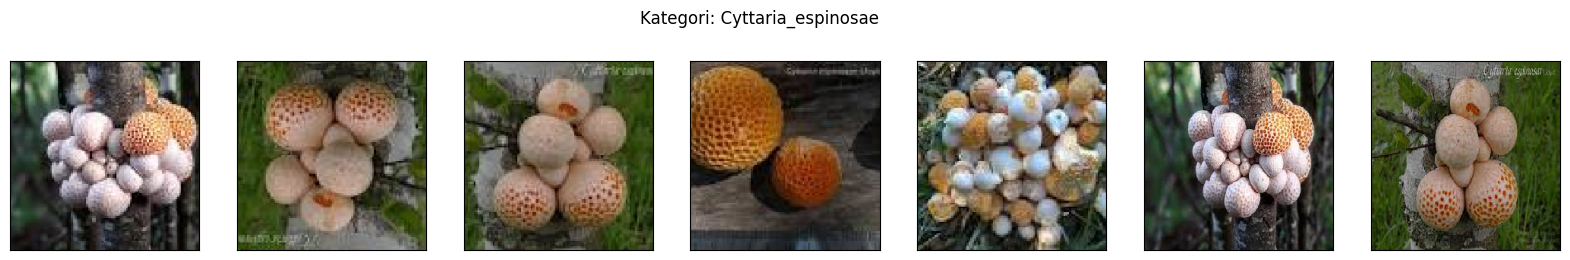

Menampilkan sample untuk kategori: Morchella_esculenta


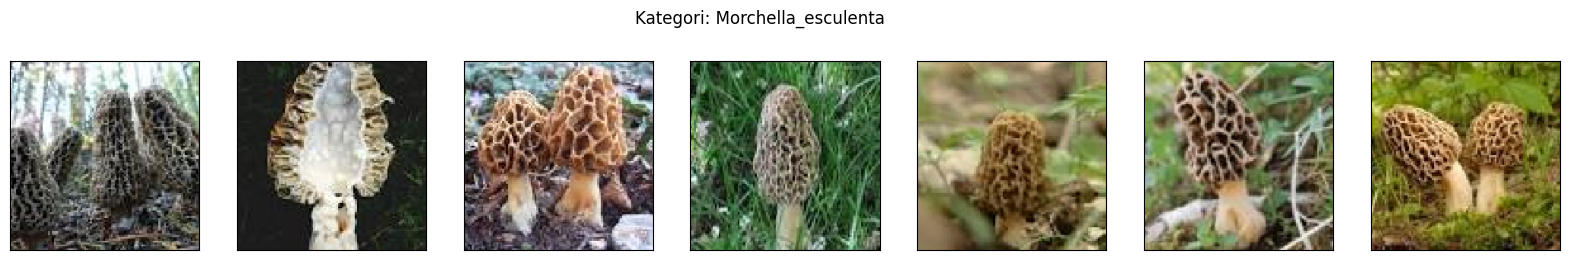

In [6]:
display_sample(datakategori)

## Pre Processing

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">

Fungsi <code>removeBackgroundByCategory</code> digunakan untuk menghapus latar belakang pada setiap gambar di setiap kategori dataset. Fungsi ini menerima input berupa dictionary yang berisi kategori dan daftar gambar, kemudian memproses setiap gambar menggunakan library <code>rembg</code> untuk menghilangkan background. Hasilnya adalah dictionary baru dengan struktur yang sama, namun setiap gambar telah melalui proses penghapusan latar belakang. Proses ini penting untuk memastikan fitur yang diekstraksi pada tahap selanjutnya lebih fokus pada objek utama dan tidak terganggu oleh latar belakang yang tidak relevan.

</div>

In [7]:
def removeBackgroundByCategory(data):
    removed_data = {}

    for kategori, items in data.items():
        removed_list = []
        for filename, img in tqdm(items, desc=f"remove background {kategori}"):
            img_removed = remove(img) 
            removed_list.append((filename, img_removed))
        removed_data[kategori] = removed_list

    return removed_data


<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">

Langkah pertama dalam preprocessing adalah menghapus latar belakang pada setiap gambar menggunakan fungsi `removeBackgroundByCategory`. Setelah latar belakang dihilangkan, gambar-gambar tersebut kemudian dikonversi ke format grayscale dengan fungsi `gray_scaling`. Proses ini bertujuan untuk menyederhanakan informasi visual pada citra, sehingga fitur yang diekstraksi pada tahap selanjutnya lebih fokus pada struktur dan tekstur utama objek jamur tanpa gangguan dari warna atau latar belakang yang tidak relevan.

</div>

In [8]:
removej = removeBackgroundByCategory(datakategori)  # pertama remove background

def gray_scaling(data):
    gray_data = {}

    for kategori, items in data.items():
        gray_list = []
        for filename, img in tqdm(items, desc=f"grayscaling {kategori}"):
            gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            gray_list.append((filename, gray))  
        gray_data[kategori] = gray_list

    return gray_data

grayj = gray_scaling(removej)  # kemudian grayscale


grayscaling Morchella_esculenta: 100%|██████████| 100/100 [00:00<00:00, 4722.25it/s]


<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">

Fungsi `display_sample(grayj)` digunakan untuk menampilkan beberapa contoh gambar hasil konversi grayscale dari setiap kategori setelah proses penghapusan background. Setelah visualisasi, seluruh gambar grayscale dari semua kategori dikumpulkan ke dalam list `gray_images` untuk memudahkan proses pemrosesan dan ekstraksi fitur pada tahap berikutnya.

</div>

Menampilkan sample untuk kategori: Cyttaria_espinosae


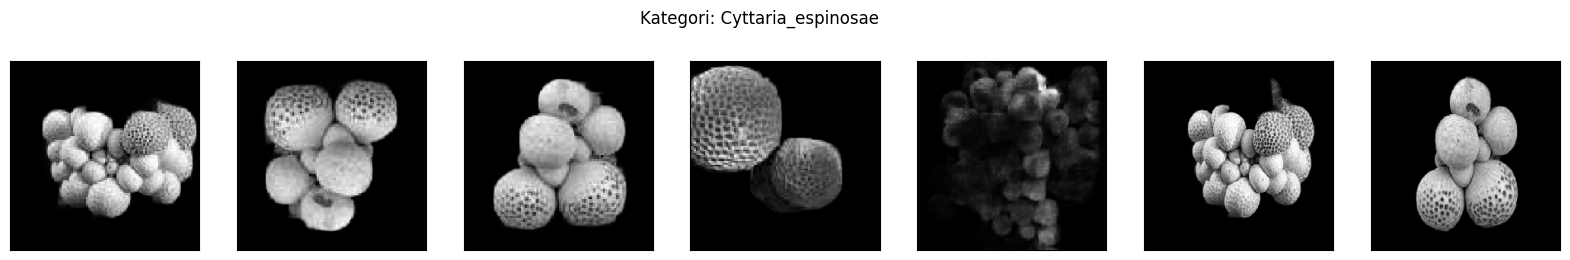

Menampilkan sample untuk kategori: Morchella_esculenta


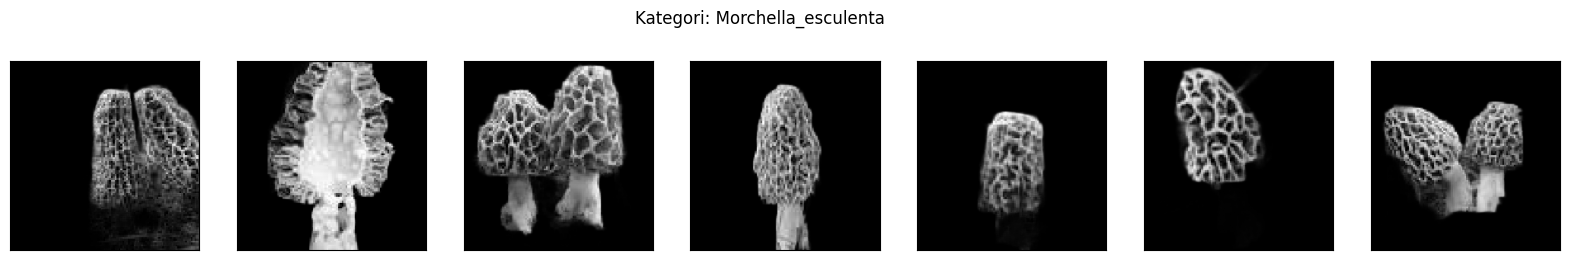

In [9]:
display_sample(grayj)

gray_images = []

for kategori in grayj:
    for filename, img in grayj[kategori]:
        gray_images.append(img)

 Fungsi `ekualisasi_histogram`, berfungsi untuk melakukan proses ekualisasi histogram pada sebuah gambar grayscale secara manual. Fungsi ini pertama-tama memastikan bahwa tipe data gambar adalah `uint8`, karena operasi histogram bekerja optimal pada tipe data ini. Selanjutnya, fungsi menghitung histogram frekuensi kemunculan tiap intensitas piksel dari 0 hingga 255. Dari histogram ini, dihitung CDF (cumulative distribution function) yang merepresentasikan distribusi kumulatif piksel. CDF tersebut kemudian dinormalisasi agar nilai piksel baru tersebar merata antara 0 sampai 255, sehingga kontras gambar meningkat. Hasilnya adalah gambar baru dengan intensitas piksel yang telah disesuaikan berdasarkan distribusi kumulatif tersebut.

Fungsi `equalize_all_images`, menerima data gambar yang sudah terorganisir berdasarkan kategori. Fungsi ini melakukan iterasi untuk setiap kategori dan gambar di dalamnya, kemudian menerapkan fungsi `ekualisasi_histogram` pada masing-masing gambar. Hasil ekualisasi untuk setiap gambar disimpan kembali dalam struktur data yang sama, mempertahankan informasi kategori dan nama file. Proses ini menggunakan `tqdm` untuk menampilkan progress bar..

Selanjutnya, kode melakukan pemanggilan fungsi ini pada dataset grayscale (`grayj`), lalu menampilkan beberapa contoh gambar hasil ekualisasi menggunakan fungsi `display_sample`. Terakhir, gambar-gambar yang sudah diekualisasi dikumpulkan ke dalam list `gray_images` untuk proses pengolahan lebih lanjut, seperti ekstraksi fitur atau pelatihan model klasifikasi.


Ekualisasi Morchella_esculenta: 100%|██████████| 100/100 [00:06<00:00, 15.01it/s]


Menampilkan sample untuk kategori: Cyttaria_espinosae


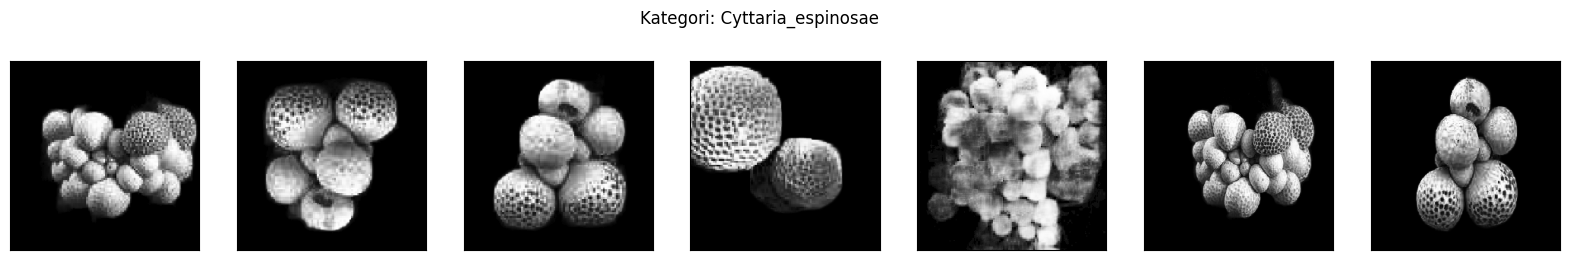

Menampilkan sample untuk kategori: Morchella_esculenta


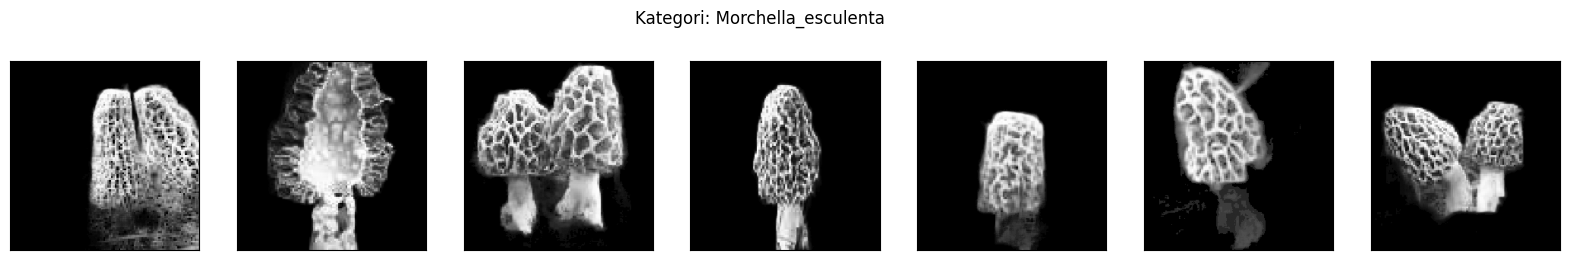

In [10]:
def ekualisasi_histogram(image):
    if image.dtype != np.uint8:
        image = (image * 255).astype(np.uint8)

    hist = np.zeros(256, dtype=int)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            hist[image[i, j]] += 1

    cdf = hist.cumsum()
    cdf_min = cdf[np.nonzero(cdf)].min()
    total_pixels = image.size
    cdf_normalized = ((cdf - cdf_min) / (total_pixels - cdf_min)) * 255
    cdf_normalized = cdf_normalized.astype('uint8')

    equalized_image = cdf_normalized[image]
    return equalized_image

def equalize_all_images(data):
    equalized_data = {}

    for kategori, data in data.items():
        eq_list = []
        for filename, img in tqdm(data, desc=f"Ekualisasi {kategori}"):
            eq_img = ekualisasi_histogram(img)
            eq_list.append((filename, eq_img))
        equalized_data[kategori] = eq_list

    return equalized_data
equ_image = equalize_all_images(grayj)  # kemudian ekualisasi histogram
display_sample(equ_image)
gray_images = []
for kategori in equ_image:
    for filename, img in equ_image[kategori]:
        gray_images.append(img)


### Analisis penggunaan ekualisasi histogram
<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">
Setelah latar belakang gambar jamur dihilangkan, langkah selanjutnya seperti ekualisasi histogram menjadi semakin penting dan efektif. Penghapusan latar belakang bertujuan untuk mengisolasi objek utama — yaitu jamur — sehingga tidak ada gangguan dari elemen-elemen di sekitarnya seperti tanah, daun, atau bayangan. Dengan demikian, seluruh piksel dalam gambar yang diproses benar-benar merepresentasikan objek yang ingin diklasifikasi. Namun, meskipun latar belakang sudah dihapus, kualitas pencahayaan pada objek jamur itu sendiri bisa saja bervariasi, seperti adanya bagian yang terlalu gelap atau terlalu terang. Inilah mengapa ekualisasi histogram menjadi langkah penting berikutnya. Ekualisasi histogram membantu menyeimbangkan distribusi intensitas piksel di seluruh gambar, sehingga detail tekstur, bentuk, dan pola permukaan jamur lebih menonjol dan mudah dikenali oleh algoritma ekstraksi fitur. Dengan meningkatkan kontras secara keseluruhan, model klasifikasi dapat memperoleh informasi visual yang lebih akurat. Ini membuat proses pelatihan model menjadi lebih efektif karena input yang digunakan telah melalui tahap pembersihan visual dan penajaman kontras. Maka, kombinasi antara penghapusan latar belakang dan ekualisasi histogram secara signifikan meningkatkan kualitas data citra sebelum dilakukan klasifikasi.
</div>

## Ekstraksi Fitur

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">
Fungsi <code>glcm(image, derajat)</code> digunakan untuk menghitung Gray Level Co-occurrence Matrix (GLCM) dari sebuah citra grayscale berdasarkan arah atau sudut tertentu. GLCM sendiri adalah metode dalam pengolahan citra yang digunakan untuk mengekstrak informasi tekstur, yaitu dengan menghitung seberapa sering sepasang piksel dengan tingkat keabuan tertentu muncul berdampingan dalam arah tertentu. Fungsi ini menerima dua parameter, yaitu image yang merupakan gambar dalam format grayscale, dan derajat yang menunjukkan arah pasangan piksel yang akan dihitung. Nilai derajat dapat berupa 0, 45, 90, atau 135 derajat. Masing-masing nilai tersebut diubah menjadi satuan radian karena fungsi <code>graycomatrix </code>membutuhkan sudut dalam radian. Jika nilai derajat tidak sesuai, maka fungsi akan menampilkan error melalui raise ValueError. Selanjutnya, fungsi memanggil <code>graycomatrix </code> dengan parameter jarak antar piksel sejauh 1, jumlah level keabuan 256 (0–255). Hasil dari <code>graycomatrix </code> adalah matriks GLCM dalam bentuk array berdimensi empat, yang menggambarkan hubungan keabuan piksel dalam arah tertentu. 
</div>

In [11]:
def glcm(image, derajat):
    if derajat == 0:
        angles = [0]
    elif derajat == 45:
        angles = [np.pi / 4]
    elif derajat == 90:
        angles = [np.pi / 2]
    elif derajat == 135:
        angles = [3 * np.pi / 4]
    else:
        raise ValueError("Invalid angle. It should be one of the following: 0, 45, 90, 135.")
    glcm = graycomatrix(image, [1], angles, 256, symmetric=True, normed=True)
    return glcm

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">

Fungsi `correlation` digunakan untuk menghitung nilai korelasi dari matriks GLCM yang telah dihasilkan pada tahap ekstraksi fitur tekstur. Korelasi ini mengukur tingkat hubungan linier antara piksel-piksel pada citra, sehingga dapat memberikan informasi tentang pola keteraturan atau kekasaran tekstur pada gambar. Nilai korelasi diambil dari hasil fungsi `graycoprops` dengan properti `'correlation'`, dan hanya elemen pertama dari matriks hasil yang digunakan sebagai fitur.

</div>

In [12]:
def correlation(matriks):
	return graycoprops(matriks, 'correlation')[0, 0]

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">

Fungsi `dissimilarity` digunakan untuk menghitung nilai dissimilarity dari matriks GLCM yang telah dihasilkan pada tahap ekstraksi fitur tekstur. Dissimilarity mengukur perbedaan rata-rata antara pasangan piksel yang bersebelahan dalam citra, sehingga dapat memberikan informasi tentang tingkat variasi tekstur. Nilai dissimilarity diambil dari hasil fungsi `graycoprops` dengan properti `'dissimilarity'`, dan hanya elemen pertama dari matriks hasil yang digunakan sebagai fitur.

</div>

In [13]:
def dissimilarity(matriks):
    return graycoprops(matriks, 'dissimilarity')[0, 0]

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">

Fungsi `homogenity` digunakan untuk menghitung nilai homogenitas dari matriks GLCM yang telah dihasilkan pada tahap ekstraksi fitur tekstur. Homogenitas mengukur seberapa seragam atau konsisten tekstur pada citra, dengan nilai yang lebih tinggi menunjukkan tekstur yang lebih seragam. Nilai homogenitas diambil dari hasil fungsi `graycoprops` dengan properti `'homogeneity'`, dan hanya elemen pertama dari matriks hasil yang digunakan sebagai fitur.

</div>

In [14]:
def homogenity(matriks):
    return graycoprops(matriks, 'homogeneity')[0, 0]

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">

Fungsi `contrast` digunakan untuk menghitung nilai kontras dari matriks GLCM yang telah dihasilkan pada tahap ekstraksi fitur tekstur. Kontras mengukur perbedaan intensitas antara piksel dan tetangganya dalam citra, sehingga dapat memberikan informasi tentang tingkat variasi atau ketajaman tekstur. Nilai kontras diambil dari hasil fungsi `graycoprops` dengan properti `'contrast'`, dan hanya elemen pertama dari matriks hasil yang digunakan sebagai fitur.

</div>

In [15]:
def contrast(matriks):
    return graycoprops(matriks, 'contrast')[0, 0]

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">

Fungsi `energy` digunakan untuk menghitung nilai energi dari matriks GLCM yang telah dihasilkan pada tahap ekstraksi fitur tekstur. Energi merupakan ukuran kekompakan atau keseragaman tekstur pada citra, dengan nilai yang lebih tinggi menunjukkan tekstur yang lebih seragam. Nilai energi diambil dari hasil fungsi `graycoprops` dengan properti `'energy'`, dan hanya elemen pertama dari matriks hasil yang digunakan sebagai fitur.

</div>

In [16]:
def energy(matriks):
    return graycoprops(matriks, 'energy')[0, 0]

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">

Fungsi `ASM` digunakan untuk menghitung nilai Angular Second Moment (ASM) dari matriks GLCM yang telah dihasilkan pada tahap ekstraksi fitur tekstur. ASM, yang juga dikenal sebagai uniformity atau energy squared, mengukur tingkat keseragaman tekstur pada citra. Nilai ASM yang tinggi menunjukkan tekstur yang lebih seragam dan teratur. Fungsi ini memanfaatkan `graycoprops` dari pustaka `skimage.feature` dengan properti `'ASM'`, dan hanya mengambil elemen pertama dari hasil sebagai fitur.

</div>

In [17]:
def ASM(matriks):
    return graycoprops(matriks, 'ASM')[0, 0]

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">

Fungsi `entropyGlcm` digunakan untuk menghitung nilai entropi dari matriks GLCM yang telah dihasilkan pada tahap ekstraksi fitur tekstur. Entropi mengukur tingkat ketidakpastian atau kompleksitas tekstur pada citra, di mana nilai yang lebih tinggi menunjukkan tekstur yang lebih acak atau tidak teratur. Fungsi ini memanfaatkan fungsi `entropy` dari pustaka `scipy.stats` dengan cara meratakan (flatten) matriks GLCM sebelum dihitung nilai entropinya.

</div>

In [18]:
def entropyGlcm(matriks):
    return entropy(matriks.ravel())

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">

Pada tahap ini, dilakukan proses ekstraksi fitur tekstur menggunakan metode Gray Level Co-occurrence Matrix (GLCM) pada citra hasil grayscale. Setiap gambar diproses untuk menghasilkan matriks GLCM pada empat sudut berbeda, yaitu 0°, 45°, 90°, dan 135°. Matriks-matriks ini kemudian akan digunakan untuk menghitung berbagai fitur tekstur seperti kontras, homogenitas, dissimilarity, energi, ASM, korelasi, dan entropi pada langkah berikutnya. Proses ini penting untuk menangkap karakteristik tekstur yang berbeda dari citra jamur pada berbagai orientasi.

</div>

In [19]:
Derajat0 = []
Derajat45 = []
Derajat90 = []
Derajat135 = []
for i in range(len(gray_images)):
    D0 = glcm(gray_images[i], 0)
    D45 = glcm(gray_images[i], 45)
    D90 = glcm(gray_images[i], 90)
    D135 = glcm(gray_images[i], 135)
    Derajat0.append(D0)
    Derajat45.append(D45)
    Derajat90.append(D90)
    Derajat135.append(D135)

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">

Pada tahap ini, dilakukan inisialisasi list kosong untuk setiap fitur tekstur yang akan diekstraksi dari hasil matriks GLCM pada empat sudut berbeda (0°, 45°, 90°, dan 135°). Fitur-fitur tersebut meliputi kontras, dissimilarity, homogenitas, entropi, ASM (Angular Second Moment), energi, dan korelasi. Setiap list akan diisi dengan nilai hasil perhitungan fitur dari seluruh citra pada dataset, sehingga memudahkan proses pembuatan tabel fitur untuk keperluan pelatihan model klasifikasi pada tahap selanjutnya.

</div>

In [20]:
Kontras0, Kontras45, Kontras90, Kontras135 = [], [], [], []
dissimilarity0, dissimilarity45, dissimilarity90, dissimilarity135 =  [], [], [], []
homogenity0, homogenity45, homogenity90, homogenity135 = [], [], [], []
entropy0, entropy45, entropy90, entropy135 =  [], [], [], []
ASM0, ASM45, ASM90, ASM135 =  [], [], [], []
energy0, energy45, energy90, energy135 =  [], [], [], []
correlation0, correlation45, correlation90, correlation135 = [], [], [], []

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">

Pada tahap ini, dilakukan perhitungan nilai korelasi dari matriks GLCM yang telah dihasilkan untuk setiap citra pada empat sudut berbeda (0°, 45°, 90°, dan 135°). Nilai korelasi ini kemudian disimpan ke dalam list `correlation0`, `correlation45`, `correlation90`, dan `correlation135`. Fitur korelasi ini akan digunakan sebagai salah satu parameter dalam proses klasifikasi citra jamur pada tahap selanjutnya.

</div>

In [21]:
for i in range(len(gray_images)):
    C0 = correlation(Derajat0[i])
    correlation0.append(C0)
    C45 = correlation(Derajat45[i])
    correlation45.append(C45)
    C90 = correlation(Derajat90[i])
    correlation90.append(C90)
    C135 = correlation(Derajat135[i])
    correlation135.append(C135)

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">

Pada tahap ini, dilakukan perhitungan nilai kontras dari matriks GLCM yang telah dihasilkan untuk setiap citra pada empat sudut berbeda (0°, 45°, 90°, dan 135°). Nilai kontras ini kemudian disimpan ke dalam list `Kontras0`, `Kontras45`, `Kontras90`, dan `Kontras135`. Fitur kontras ini akan digunakan sebagai salah satu parameter dalam proses klasifikasi citra jamur pada tahap selanjutnya.

</div>

In [22]:
for i in range(len(data)):
    K0 = contrast(Derajat0[i])
    K45 = contrast(Derajat45[i])
    K90 = contrast(Derajat90[i])
    K135 = contrast(Derajat135[i])
    Kontras0.append(K0)
    Kontras45.append(K45)
    Kontras90.append(K90)
    Kontras135.append(K135)

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">

Pada tahap ini, dilakukan perhitungan nilai dissimilarity dari matriks GLCM yang telah dihasilkan untuk setiap citra pada empat sudut berbeda (0°, 45°, 90°, dan 135°). Nilai dissimilarity ini kemudian disimpan ke dalam list `dissimilarity0`, `dissimilarity45`, `dissimilarity90`, dan `dissimilarity135`. Fitur dissimilarity ini akan digunakan sebagai salah satu parameter dalam proses klasifikasi citra jamur pada tahap selanjutnya.

</div>

In [23]:
for i in range(len(data)):
    Dis0 = dissimilarity(Derajat0[i])
    Dis45 = dissimilarity(Derajat45[i])
    Dis90 = dissimilarity(Derajat90[i])
    Dis135 = dissimilarity(Derajat135[i])
    dissimilarity0.append(Dis0)
    dissimilarity45.append(Dis45)
    dissimilarity90.append(Dis90)
    dissimilarity135.append(Dis135)

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">

Pada tahap ini, dilakukan perhitungan nilai homogenitas dari matriks GLCM yang telah dihasilkan untuk setiap citra pada empat sudut berbeda (0°, 45°, 90°, dan 135°). Nilai homogenitas ini kemudian disimpan ke dalam list `homogenity0`, `homogenity45`, `homogenity90`, dan `homogenity135`. Fitur homogenitas ini akan digunakan sebagai salah satu parameter dalam proses klasifikasi citra jamur pada tahap selanjutnya.

</div>

In [24]:
for i in range(len(data)):
    H0 = homogenity(Derajat0[i])
    H45 = homogenity(Derajat45[i])
    H90 = homogenity(Derajat90[i])
    H135 = homogenity(Derajat135[i])
    homogenity0.append(H0)
    homogenity45.append(H45)
    homogenity90.append(H90)
    homogenity135.append(H135)

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">

Pada tahap ini, dilakukan perhitungan nilai entropi dari matriks GLCM yang telah dihasilkan untuk setiap citra pada empat sudut berbeda (0°, 45°, 90°, dan 135°). Nilai entropi ini kemudian disimpan ke dalam list `entropy0`, `entropy45`, `entropy90`, dan `entropy135`. Fitur entropi ini akan digunakan sebagai salah satu parameter dalam proses klasifikasi citra jamur pada tahap selanjutnya.

</div>

In [25]:
for i in range(len(data)):  
    E0 = entropyGlcm(Derajat0[i])
    E45 = entropyGlcm(Derajat45[i])
    E90 = entropyGlcm(Derajat90[i])
    E135 = entropyGlcm(Derajat135[i])
    entropy0.append(E0)
    entropy45.append(E45)
    entropy90.append(E90)
    entropy135.append(E135)

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">

Pada tahap ini, dilakukan perhitungan nilai ASM (Angular Second Moment) dari matriks GLCM yang telah dihasilkan untuk setiap citra pada empat sudut berbeda (0°, 45°, 90°, dan 135°). Nilai ASM ini kemudian disimpan ke dalam list `ASM0`, `ASM45`, `ASM90`, dan `ASM135`. Fitur ASM ini akan digunakan sebagai salah satu parameter dalam proses klasifikasi citra jamur pada tahap selanjutnya.

</div>

In [26]:
for i in range(len(data)):
    A0 = ASM(Derajat0[i])
    A45 = ASM(Derajat45[i])
    A90 = ASM(Derajat90[i])
    A135 = ASM(Derajat135[i])
    ASM0.append(A0)
    ASM45.append(A45)
    ASM90.append(A90)
    ASM135.append(A135)

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">

Pada tahap ini, dilakukan perhitungan nilai energi dari matriks GLCM yang telah dihasilkan untuk setiap citra pada empat sudut berbeda (0°, 45°, 90°, dan 135°). Nilai energi ini kemudian disimpan ke dalam list `energy0`, `energy45`, `energy90`, dan `energy135`. Fitur energi ini akan digunakan sebagai salah satu parameter dalam proses klasifikasi citra jamur pada tahap selanjutnya.

</div>

In [27]:
for i in range(len(data)):
    ER0 = energy(Derajat0[i])
    ER45 = energy(Derajat45[i])
    ER90 = energy(Derajat90[i])
    ER135 = energy(Derajat135[i])
    energy0.append(ER0)
    energy45.append(ER45)
    energy90.append(ER90)
    energy135.append(ER135)

<div style="text-align: justify; font-family: Arial, sans-serif; line-height: 1.6;">

Kode di bawah ini mengompilasi seluruh fitur tekstur yang telah diekstraksi dari citra jamur (seperti kontras, homogenitas, dissimilarity, entropi, ASM, energi, dan korelasi pada berbagai sudut GLCM) ke dalam sebuah tabel menggunakan struktur DataFrame dari <code>pandas</code>. Setiap baris pada tabel mewakili satu citra jamur, lengkap dengan nama file, label kategori, dan nilai-nilai fitur yang telah dihitung. DataFrame ini kemudian disimpan ke dalam file CSV (`hasil_ekstraksi2.csv`) untuk memudahkan proses analisis dan pelatihan model klasifikasi pada tahap berikutnya. Visualisasi DataFrame juga dilakukan untuk memastikan data telah tersusun dengan benar sebelum digunakan lebih lanjut.

</div>

In [28]:
label = [1] * 100 + [0] * 100
dataTable = {'Filename': filenames, 'Label': path,
        'Contrast0': Kontras0, 'Contrast45': Kontras45, 'Contrast90': Kontras90, 'Contrast135': Kontras135,
        'Homogeneity0': homogenity0, 'Homogeneity45': homogenity45, 'Homogeneity90': homogenity90, 'Homogeneity135': homogenity135,
        'Dissimilarity0': dissimilarity0, 'Dissimilarity45': dissimilarity45, 'Dissimilarity90': dissimilarity90, 'Dissimilarity135': dissimilarity135,
        'Entropy0': entropy0, 'Entropy45': entropy45, 'Entropy90': entropy90, 'Entropy135': entropy135,
        'ASM0': ASM0, 'ASM45': ASM45, 'ASM90': ASM90, 'ASM135': ASM135,
        'Energy0': energy0, 'Energy45': energy45, 'Energy90': energy90, 'Energy135': energy135,
        'Correlation0': correlation0, 'Correlation45': correlation45, 'Correlation90': correlation90, 'Correlation135': correlation135,
        }
df = pd.DataFrame(dataTable)
df.to_csv('hasil_ekstraksi2.csv', index=False)

hasilEkstrak = pd.read_csv('hasil_ekstraksi2.csv')
hasilEkstrak


,Filename,Label,Contrast0,Contrast45,Contrast90,Contrast135,Homogeneity0,Homogeneity45,Homogeneity90,Homogeneity135,...,ASM90,ASM135,Energy0,Energy45,Energy90,Energy135,Correlation0,Correlation45,Correlation90,Correlation135
0,asli_Cyttaria_espinosae0.png,Cyttaria_espinosae,312.396498,507.621619,261.639647,506.309995,0.804341,0.717362,0.805115,0.716223,...,0.340607,0.335508,0.583017,0.579150,0.583616,0.579231,0.974746,0.959055,0.978849,0.959161
1,asli_Cyttaria_espinosae1 - 180.png,Cyttaria_espinosae,238.823165,419.002694,214.439068,412.088257,0.794004,0.699487,0.794319,0.701028,...,0.301669,0.297321,0.548936,0.544865,0.549244,0.545271,0.981607,0.967794,0.983485,0.968325
2,asli_Cyttaria_espinosae1.png,Cyttaria_espinosae,252.009253,446.907372,229.707020,435.364784,0.801781,0.710220,0.802680,0.709978,...,0.315159,0.310578,0.560887,0.556668,0.561390,0.557296,0.980350,0.965225,0.982089,0.966123
3,asli_Cyttaria_espinosae10.png,Cyttaria_espinosae,376.249382,707.771359,425.249703,752.121063,0.826265,0.735297,0.821153,0.733690,...,0.347798,0.344864,0.591590,0.587831,0.589744,0.587251,0.969474,0.942705,0.965529,0.939115
4,asli_Cyttaria_espinosae11.png,Cyttaria_espinosae,214.625414,380.947001,207.460932,396.647425,0.446405,0.376452,0.456678,0.376905,...,0.051795,0.047722,0.224753,0.217873,0.227585,0.218454,0.984553,0.972566,0.985083,0.971436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,rotasi90_Morchella_esculenta2.png,Morchella_esculenta,273.063775,555.756101,311.775036,501.001952,0.855382,0.804770,0.858255,0.805153,...,0.536599,0.532399,0.731962,0.729479,0.732529,0.729657,0.970305,0.939744,0.966095,0.945680
196,rotasi90_Morchella_esculenta20.png,Morchella_esculenta,193.816675,476.460831,303.460016,447.324592,0.879377,0.834229,0.875198,0.835110,...,0.598404,0.595261,0.774312,0.771547,0.773566,0.771531,0.975950,0.941067,0.962345,0.944671
197,rotasi90_Morchella_esculenta23.png,Morchella_esculenta,488.842779,1050.121450,675.289687,1079.327172,0.745268,0.618386,0.744724,0.618824,...,0.173170,0.170409,0.416937,0.412965,0.416137,0.412806,0.965537,0.926039,0.952439,0.923982
198,rotasi90_Morchella_esculenta38.png,Morchella_esculenta,139.799614,441.345462,328.770281,358.653441,0.868025,0.819864,0.825001,0.822858,...,0.634241,0.632649,0.798676,0.794792,0.796393,0.795393,0.980950,0.940058,0.955201,0.951289


## Feature Selection

### Correlation

Kode di bawah bertujuan melakukan seleksi fitur dengan metode korelasi untuk mengurangi redundansi antar fitur. Korelasi antar fitur dihitung menggunakan fungsi `.corr()` dari <code>pandas </code>. Fitur-fitur yang memiliki korelasi absolut lebih dari threshold (misal 0.95) dianggap sangat mirip dan salah satunya akan dihapus agar tidak terjadi multikolinearitas pada model klasifikasi. Hasil seleksi fitur divisualisasikan menggunakan <code>heatmap</code> untuk memudahkan analisis hubungan antar fitur yang tersisa. Proses ini bertujuan untuk meningkatkan performa dan interpretabilitas model dengan hanya menggunakan fitur-fitur yang saling independen.

<Axes: >

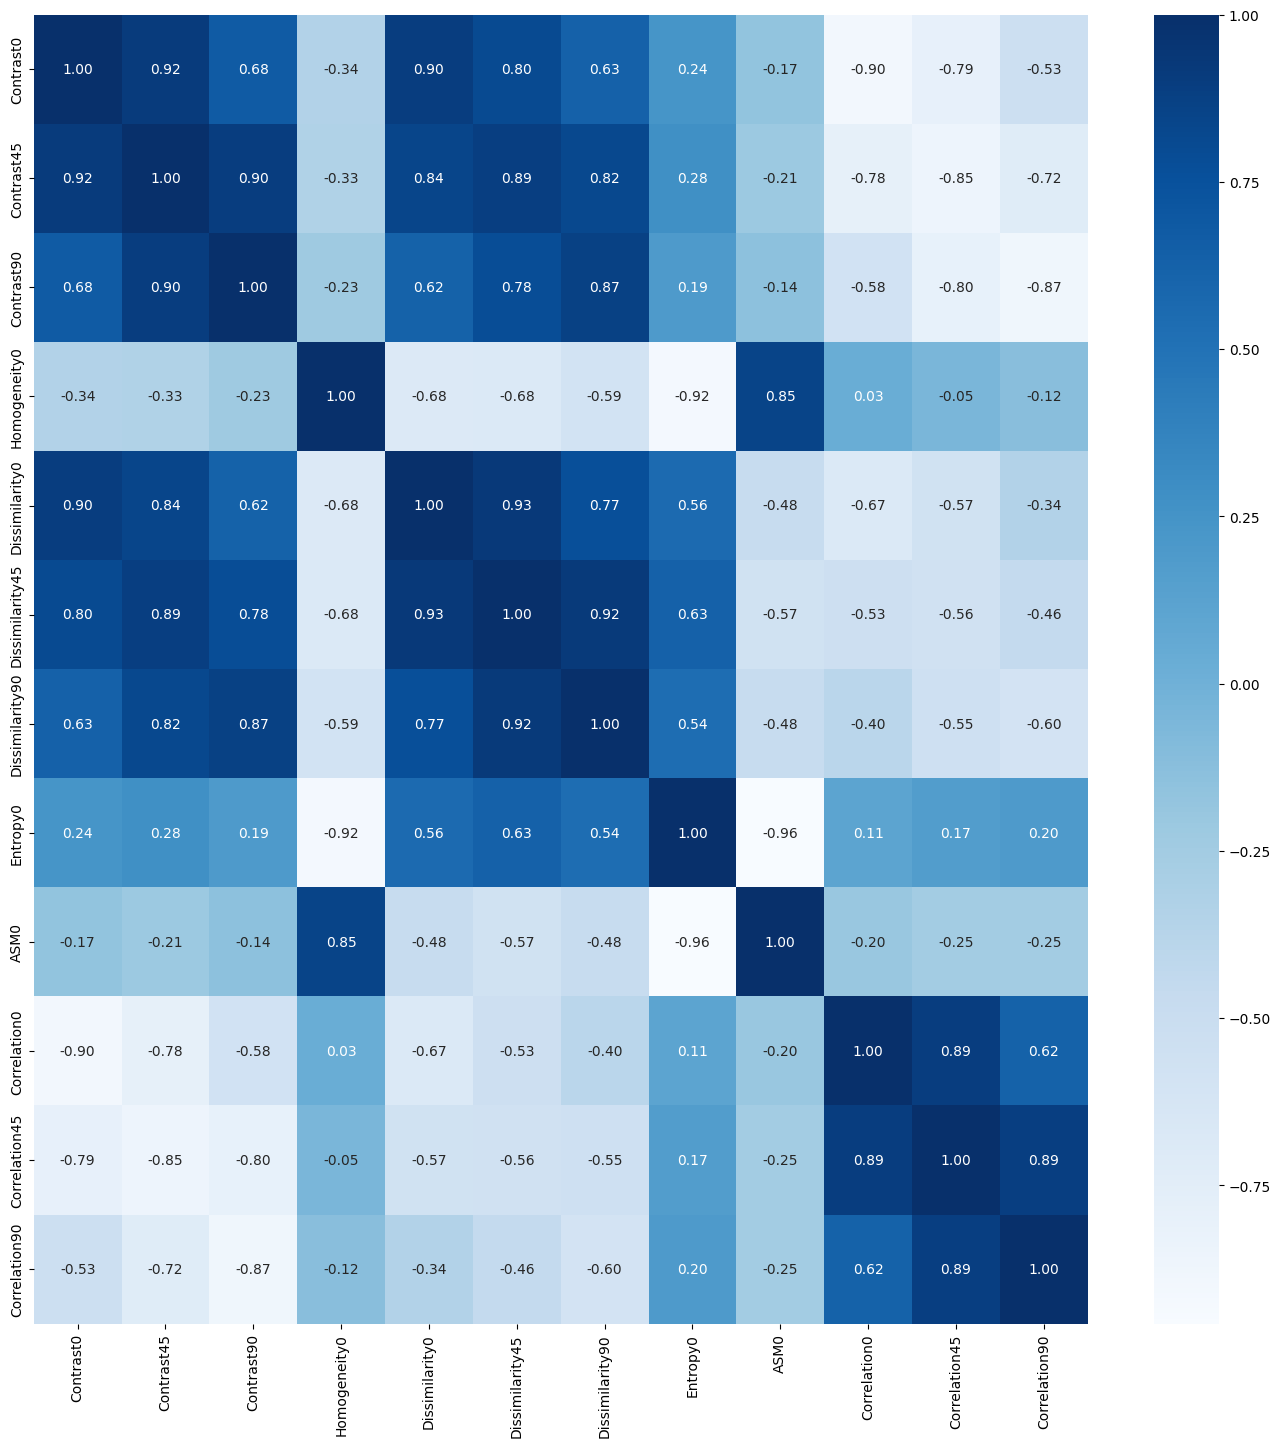

In [29]:
# Menghitung korelasi
correlation = hasilEkstrak.drop(columns=['Label','Filename']).corr()

# Menyaring fitur yang memiliki korelasi absolut lebih dari 0.95 dengan label
threshold = 0.95 # atur threshold ini untuk menentukan seberapa besar korelasi yang ingin disaring
selectionFeature = []
columns = np.full((correlation.shape[0],), True, dtype=bool)
for i in range(correlation.shape[0]):
	for j in range(i+1, correlation.shape[0]):
		if correlation.iloc[i,j] >= threshold:
			if columns[j]:
				columns[j] = False
select = hasilEkstrak.drop(columns=['Label','Filename']).columns[columns]
x_new = hasilEkstrak[select]
x_new
y = hasilEkstrak['Label']
plt.figure(figsize=(17,17))
sns.heatmap(x_new.corr(), annot=True, cmap='Blues', fmt=".2f")

## Splitting Data

<div style="font-family: Arial, sans-serif; line-height: 1.6; text-align: justify;">

Kode di bawah digunakan untuk membagi dataset fitur hasil ekstraksi ke dalam <code> training </code> dan <code> testing </code>  menggunakan fungsi `train_test_split` dari library <code> scikit-learn </code>. Proses ini sangat penting dalam workflow machine learning karena bertujuan untuk memisahkan sebagian data pada percobaan ini 20% dari total data sebagai code> testing </code> yang tidak akan dilibatkan dalam proses pelatihan model, sehingga evaluasi performa model menjadi lebih objektif dan tidak bias. Parameter `random_state=42` digunakan agar proses pembagian data bersifat reproducible, sehingga hasil split akan selalu sama setiap kali kode dijalankan. Setelah proses pembagian, kode juga menampilkan jumlah data pada masing-masing subset (X_train dan X_test) untuk memastikan proporsi pembagian sudah sesuai dengan yang diharapkan.

</div>

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(160, 12)
(40, 12)


## Normalisasi

<div style="font-family: Arial, sans-serif; line-height: 1.6; text-align: justify;">

Kode berikut melakukan proses normalisasi fitur pada data training (<code>X_train</code>) dan data testing (<code>X_test</code>) menggunakan metode standardisasi (mean-std normalization). Proses ini dilakukan dengan cara mengurangi setiap nilai fitur dengan rata-rata (<code>mean</code>) dari data training dan membaginya dengan standar deviasi (<code>std</code>) dari data pelatihan. Normalisasi ini bertujuan untuk memastikan seluruh fitur berada pada skala yang sama (memiliki rata-rata 0 dan standar deviasi 1), sehingga model machine learning tidak bias terhadap fitur dengan rentang nilai yang lebih besar.

Penting untuk dicatat bahwa mean dan std yang digunakan untuk menormalkan <code>X_test</code> diambil dari <code>X_train</code>, bukan dari <code>X_test</code> itu sendiri. Hal ini untuk menghindari kebocoran data (data leakage) dan memastikan proses normalisasi konsisten antara data training dan testing.

Normalisasi seperti ini sangat penting terutama untuk algoritma yang sensitif terhadap skala fitur, seperti KNN, SVM, dan algoritma berbasis jarak lainnya.

</div>

In [31]:
# normalisasi mean std
X_test = (X_test - X_train.mean()) / X_train.std()
X_train = (X_train - X_train.mean()) / X_train.std()

## Modeling

### Define Model

<div style="font-family: Arial, sans-serif; line-height: 1.6; text-align: justify;">

Kode di atas mendefinisikan sebuah fungsi dan beberapa model klasifikasi untuk analisis data. Fungsi <code>generateClassificationReport</code> menerima dua parameter, yaitu <code>y_true</code> (label asli) dan <code>y_pred</code> (label prediksi dari model). Fungsi ini mencetak laporan klasifikasi lengkap yang meliputi metrik seperti precision, recall, dan F1-score dengan menggunakan <code>classification_report</code>. Selain itu, fungsi juga menampilkan matriks kebingungan (<code>confusion_matrix</code>) untuk menggambarkan performa klasifikasi secara visual, serta menghitung dan mencetak akurasi (<code>accuracy_score</code>) yang menunjukkan proporsi prediksi benar dari total data.

Selanjutnya, kode ini mendefinisikan tiga model klasifikasi yang berbeda:
- <code>RandomForestClassifier</code> dengan 5 pohon keputusan dan random state 42 untuk memastikan hasil yang konsisten.
- <code>SVC</code> (Support Vector Classifier) dengan kernel radial basis function (RBF) dan random state 42.
- <code>KNeighborsClassifier</code> dengan jumlah tetangga (neighbors) sebanyak 5.

Ketiga model ini umum digunakan dalam machine learning untuk tugas klasifikasi dan dapat dibandingkan performanya menggunakan fungsi yang telah dibuat.

</div>


In [32]:
def generateClassificationReport(y_true, y_pred):
	print(classification_report(y_true, y_pred))
	print(confusion_matrix(y_true, y_pred))
	print('Accuracy:', accuracy_score(y_true, y_pred))

# Define classifiers
rf = RandomForestClassifier(n_estimators=5, random_state=42)
svm = SVC(kernel='rbf', random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)


### Train Random Forest Classifier

<div style="font-family: Arial, sans-serif; line-height: 1.6; text-align: justify;">

Kode di bawah melakukan pelatihan dan evaluasi model klasifikasi menggunakan algoritma <strong>Random Forest</strong>. Pertama-tama, model <code>rf</code> dilatih dengan data <code>X_train</code> dan label <code>y_train</code> menggunakan fungsi <code>fit()</code>. Setelah model dilatih, prediksi dilakukan terhadap data pelatihan sendiri, kemudian hasilnya dievaluasi melalui fungsi <code>generateClassificationReport</code> yang mencetak precision, recall, f1-score, support, dan akurasi secara keseluruhan.

</div>


In [33]:
# Train Random Forest Classifier
rf.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("------Training Set------")
y_pred = rf.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = rf.predict(X_test)
generateClassificationReport( y_test, y_pred)

------Training Set------
                     precision    recall  f1-score   support

 Cyttaria_espinosae       0.97      0.97      0.97        79
Morchella_esculenta       0.98      0.98      0.98        81

           accuracy                           0.97       160
          macro avg       0.97      0.97      0.97       160
       weighted avg       0.97      0.97      0.97       160

[[77  2]
 [ 2 79]]
Accuracy: 0.975

------Testing Set------
                     precision    recall  f1-score   support

 Cyttaria_espinosae       0.73      0.90      0.81        21
Morchella_esculenta       0.86      0.63      0.73        19

           accuracy                           0.78        40
          macro avg       0.79      0.77      0.77        40
       weighted avg       0.79      0.78      0.77        40

[[19  2]
 [ 7 12]]
Accuracy: 0.775


### Analisis Random Forest Classifier

<div style="font-family: Arial, sans-serif; line-height: 1.6; text-align: justify;">
Hasil klasifikasi menggunakan algoritma Random Forest sebelum dan sesudah preprocessing menunjukkan perbedaan. Sebelum dilakukan preprocessing, model Random Forest menghasilkan akurasi sebesar 98% pada data training dan 82% pada data testing. Ini menunjukkan bahwa model mampu mempelajari data dengan sangat baik, namun terdapat indikasi overfitting karena selisih akurasi antara training dan testing cukup besar. Setelah dilakukan preprocessing, yaitu penghapusan latar belakang dan ekualisasi histogram, akurasi training sedikit menurun menjadi 97.5%, sedangkan akurasi testing justru menurun menjadi 77.5%. Meskipun preprocessing bertujuan untuk meningkatkan kejelasan fitur citra dan menghilangkan gangguan dari latar belakang, hasil ini menunjukkan bahwa informasi penting yang sebelumnya digunakan oleh model untuk klasifikasi kemungkinan ikut terhapus atau berubah karakteristiknya. Hal ini terlihat dari penurunan performa pada kelas Morchella_esculenta terutama pada recall-nya, meskipun recall kelas Cyttaria_espinosae meningkat. Artinya, preprocessing memberikan dampak yang tidak merata terhadap setiap kelas. Penurunan akurasi training justru bisa menjadi tanda bahwa model menjadi lebih generalis, namun karena data testing juga menurun akurasinya, diperlukan evaluasi lebih lanjut terhadap metode preprocessing yang digunakan.
</div>

### Train SVM Classifier

<div style="font-family: Arial, sans-serif; line-height: 1.6; text-align: justify;">

Kode di bawah digunakan untuk melakukan pelatihan dan evaluasi model <strong>Support Vector Machine (SVM)</strong>. Pertama, model SVM dilatih menggunakan data pelatihan melalui perintah <code>svm.fit(X_train, y_train)</code>. Setelah pelatihan selesai, prediksi dilakukan terhadap data pelatihan dan pengujian secara terpisah menggunakan <code>svm.predict</code>. Hasil prediksi ini kemudian dievaluasi menggunakan fungsi <code>generateClassificationReport</code> yang menampilkan metrik evaluasi seperti <em>precision</em>, <em>recall</em>, <em>f1-score</em>, dan <em>accuracy</em> untuk masing-masing kelas citra.

</div>


In [34]:
# Train SVM Classifier
svm.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred = svm.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = svm.predict(X_test)
generateClassificationReport( y_test, y_pred)


------Training Set------
                     precision    recall  f1-score   support

 Cyttaria_espinosae       0.81      0.76      0.78        79
Morchella_esculenta       0.78      0.83      0.80        81

           accuracy                           0.79       160
          macro avg       0.79      0.79      0.79       160
       weighted avg       0.79      0.79      0.79       160

[[60 19]
 [14 67]]
Accuracy: 0.79375

------Testing Set------
                     precision    recall  f1-score   support

 Cyttaria_espinosae       0.76      0.76      0.76        21
Morchella_esculenta       0.74      0.74      0.74        19

           accuracy                           0.75        40
          macro avg       0.75      0.75      0.75        40
       weighted avg       0.75      0.75      0.75        40

[[16  5]
 [ 5 14]]
Accuracy: 0.75


### Analisis SVM Classifier

<div style="font-family: Arial, sans-serif; line-height: 1.6; text-align: justify;">
Pada data training, akurasi tercatat sebesar 79.37%, dan pada data testing turun menjadi 75%. Nilai precision, recall, dan f1-score untuk kedua kelas (Cyttaria_espinosae dan Morchella_esculenta) cukup merata, dengan selisih yang kecil antar keduanya. Hal ini menunjukkan bahwa model SVM pasca-preprocessing mampu melakukan klasifikasi yang adil terhadap kedua kelas tanpa bias signifikan. Akan tetapi, dibandingkan dengan hasil SVM sebelum preprocessing, terlihat bahwa preprocessing tidak memberikan dampak peningkatan, justru sedikit menurunkan performa. Kemungkinan besar, informasi visual penting yang berkaitan dengan tekstur atau pola warna jamur ikut berubah atau hilang saat latar belakang dihapus atau ketika ekualisasi histogram dilakukan. Akibatnya, fitur yang sebelumnya efektif dalam membedakan kelas menjadi kurang informatif. Meskipun penurunan performa tidak terlalu drastis, hasil ini menunjukkan bahwa SVM cukup sensitif terhadap perubahan distribusi data visual. 

### Train KNN Classifier

<div style="font-family: Arial, sans-serif; line-height: 1.6; text-align: justify;">

Kode di bawah digunakan untuk melatih dan mengevaluasi model klasifikasi <strong>K-Nearest Neighbors (KNN)</strong> dengan jumlah tetangga <code>k = 5</code>. Model ini dilatih menggunakan data <em>training</em> yang telah dinormalisasi, dan kemudian diuji pada data <em>training</em> dan <em>testing</em> untuk mengetahui seberapa baik model mengenali pola dan menggeneralisasi data baru. Fungsi <code>generateClassificationReport</code> digunakan untuk mencetak metrik evaluasi berupa <em>precision</em>, <em>recall</em>, <em>f1-score</em>, confusion matrix, dan akurasi keseluruhan.

</div>

In [35]:
# Train KNN Classifier
knn.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred = knn.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = knn.predict(X_test)
generateClassificationReport( y_test, y_pred)



------Training Set------
                     precision    recall  f1-score   support

 Cyttaria_espinosae       0.82      0.87      0.85        79
Morchella_esculenta       0.87      0.81      0.84        81

           accuracy                           0.84       160
          macro avg       0.84      0.84      0.84       160
       weighted avg       0.85      0.84      0.84       160

[[69 10]
 [15 66]]
Accuracy: 0.84375

------Testing Set------
                     precision    recall  f1-score   support

 Cyttaria_espinosae       0.77      0.81      0.79        21
Morchella_esculenta       0.78      0.74      0.76        19

           accuracy                           0.78        40
          macro avg       0.78      0.77      0.77        40
       weighted avg       0.78      0.78      0.77        40

[[17  4]
 [ 5 14]]
Accuracy: 0.775


### Analisis KNN Classifier

<div style="font-family: Arial, sans-serif; line-height: 1.6; text-align: justify;">
 Meskipun akurasi training menurun dari 90% ke 84.37%, penurunan ini mengurangi overfitting, karena akurasi testing justru meningkat dari 72.5% ke 77.5%. Ini menunjukkan bahwa setelah preprocessing (penghapusan latar belakang dan ekualisasi histogram), fitur visual yang digunakan oleh KNN menjadi lebih bersih dan fokus pada objek utama (jamur), sehingga model lebih mampu mengenali pola pada data baru.

Model KNN sangat tergantung pada jarak fitur antar citra, sehingga keberadaan noise visual seperti latar belakang atau pencahayaan yang tidak merata bisa membuat jarak antar data menjadi tidak akurat.
</div>

## Evaluasi Dengan Confusion Matrix

<div style="font-family: Arial, sans-serif; line-height: 1.6; text-align: justify;">

Kode berikut digunakan untuk memvisualisasikan hasil evaluasi model klasifikasi citra jamur dalam bentuk <strong>confusion matrix</strong>. Fungsi <code>plot_confusion_matrix</code> menerima tiga parameter: <code>y_true</code> (label sebenarnya), <code>y_pred</code> (label prediksi model), dan <code>title</code> (judul plot). Di dalam fungsi, <code>confusion_matrix</code> dari <code>sklearn</code> digunakan untuk menghitung matriks konfusi berdasarkan data aktual dan prediksi, lalu <code>ConfusionMatrixDisplay</code> digunakan untuk menampilkan visualisasi matriks tersebut dengan skema warna biru (<code>plt.cm.Blues</code>).

Setelah fungsi didefinisikan, kode selanjutnya memanggil fungsi ini untuk masing-masing model klasifikasi: <strong>Random Forest</strong>, <strong>SVM</strong>, dan <strong>K-Nearest Neighbors (KNN)</strong>. Setiap pemanggilan akan menampilkan confusion matrix berdasarkan hasil prediksi model terhadap data uji. Visualisasi ini sangat membantu untuk mengetahui seberapa baik model mengenali masing-masing kelas jamur (<em>Cyttaria espinosae</em> dan <em>Morchella esculenta</em>), serta mengidentifikasi pola kesalahan klasifikasi yang terjadi pada masing-masing model.

</div>

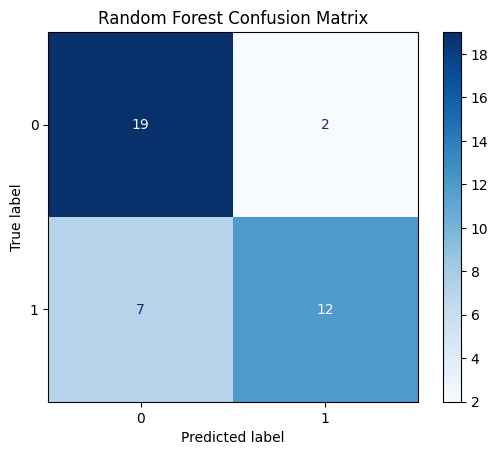

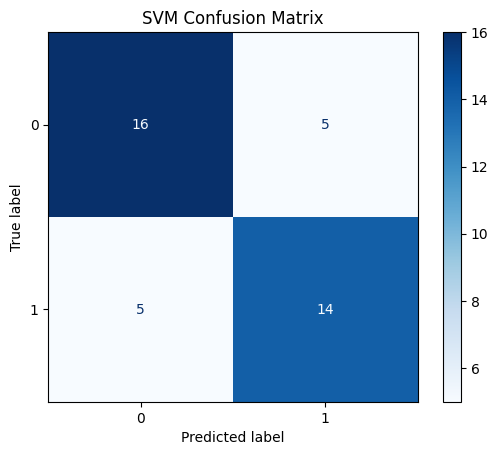

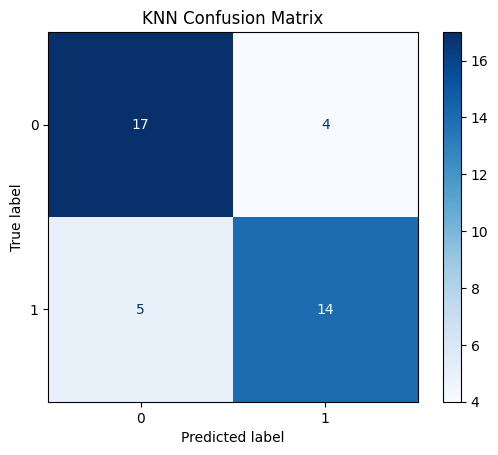

In [36]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, rf.predict(X_test), "Random Forest Confusion Matrix")
# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, svm.predict(X_test), "SVM Confusion Matrix")
# Plot confusion matrix for KNN
plot_confusion_matrix(y_test, knn.predict(X_test), "KNN Confusion Matrix")